<img src="https://drive.google.com/uc?id=1RohkD9r7-EWyazolYLv2oG7eaUfZNbNR" />

### Contents
<ul>
    <li><a href='#1'>Libraries & Contants</a></li>
    <li><a href='#2'>Implementing practical functions</a></li>
    <li><a href='#3'>Create the dataset</a></li>
    <li><a href='#4'>Logistic regression model</a></li>
    <li><a href='#5'>Some information about PyTorch</a></li>
    <li><a href='#6'>Plot the surface</a></li>
    <li><a href='#7'>Criterian(Loss) Function</a></li>
    <li><a href='#8'>Train the model</a></li>
    <li><a href='#9'>Accuracy</a></li>
    
</ul>
<hr>


This type of statistical analysis (also known as logit model) is often used for predictive analytics and modeling, and extends to applications in machine learning. In this analytics approach, the dependent variable is finite or categorical: either A or B (binary regression) or a range of finite options A, B, C or D (multinomial regression). It is used in statistical software to understand the relationship between the dependent variable and one or more independent variables by estimating probabilities using a logistic regression equation. 

<h2><div id='1'>Libraries & Contants</div></h2>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

<h2><div id='2'>Implementing practical functions</div></h2>

In [ ]:
class plot_error_surfaces(object):
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                yhat= 1 / (1 + np.exp(-1*(w2*self.x+b2)))
                Z[count1,count2]=-1*np.mean(self.y*np.log(yhat+1e-16) +(1-self.y)*np.log(1-yhat+1e-16))
                count2 += 1   
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize=(7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
     # Setter
    def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c='r', marker='x', s=200, alpha=1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
        
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label="estimated line")
        plt.plot(self.x, 1 / (1 + np.exp(-1 * (self.W[-1] * self.x + self.B[-1]))), label='sigmoid')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-0.1, 2))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.show()
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        
# Plot the diagram

def PlotStuff(X, Y, model, epoch, leg=True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    if leg == True:
        plt.legend()
    else:
        pass

<h2><div id='3'>Create the dataset</div></h2>
Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

In [ ]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-1, 1, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0], 1)
        self.y[self.x[:, 0] > 0.7] = 1
        self.len = self.x.shape[0]
    
    def __getitem__(self, index):      
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [ ]:
data_set = Data()

<h2><div id='4'>Logistic regression model</div></h2>

In [ ]:
class logistic_regression(nn.Module):
    def __init__(self, n_inputs):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)

    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

In [ ]:
# input = 1 -> the number of model inputs
model = logistic_regression(1)

<h2><div id='5'>Some information about PyTorch</div></h2>
In PyTorch, the learnable parameters (i.e. weights and biases) of a torch. ... A state_dict is simply a Python dictionary object that maps each layer to its parameter tensor.

In [ ]:
model.state_dict()['linear.weight'].data[0] = torch.tensor([[-5]])
model.state_dict()['linear.bias'].data[0] = torch.tensor([[-10]])
print("The parameters: ", model.state_dict())

The parameters:  OrderedDict([('linear.weight', tensor([[-5.]])), ('linear.bias', tensor([-10.]))])


<h2><div id='6'>Plot the surface</div></h2>

<Figure size 432x288 with 0 Axes>

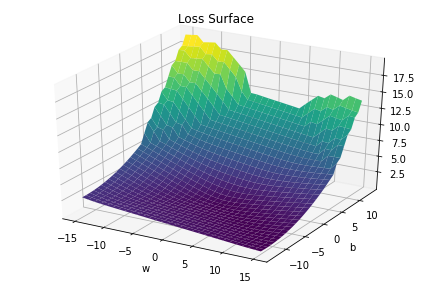

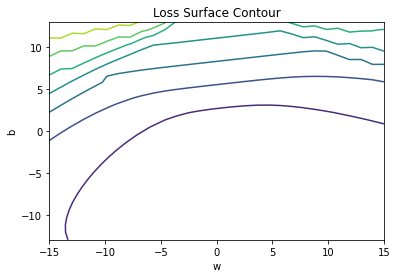

In [ ]:
# Create the plot_error_surfaces object

get_surface = plot_error_surfaces(15, 13, data_set[:][0], data_set[:][1], 30)

<h2><div id='7'>Criterian(Loss) Function</div></h2>

In [ ]:
def criterion(yhat,y):
    out = -1 * torch.mean(y * torch.log(yhat) + (1 - y) * torch.log(1 - yhat))
    return out

# Build in criterion
# criterion = nn.BCELoss()

trainloader = DataLoader(dataset = data_set, batch_size = 3)
learning_rate = 2
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

<h2><div id='8'>Train the model</div></h2>

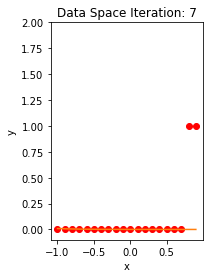

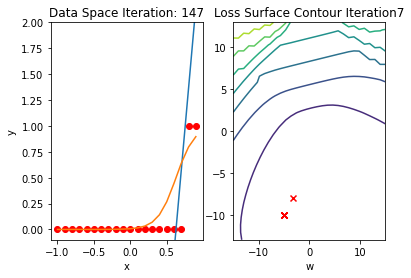

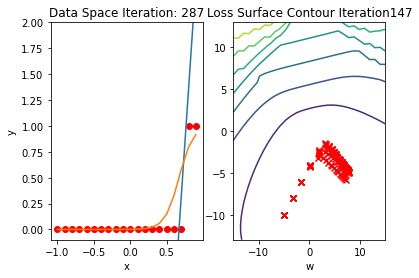

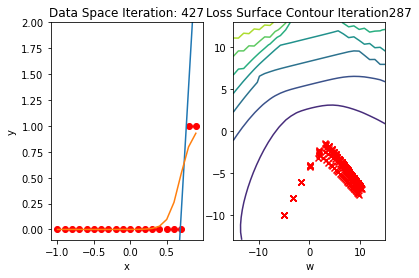

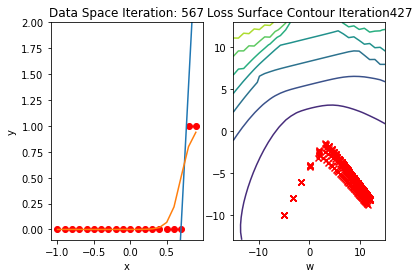

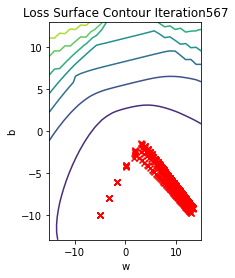

In [ ]:
def train_model(epochs):
    for epoch in range(epochs):
        for x, y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            get_surface.set_para_loss(model, loss.tolist())
        if epoch % 20 == 0:
            get_surface.plot_ps()
            
train_model(100)

<h2><div id='9'>Accuracy</div></h2>

In [ ]:
# Make the Prediction

yhat = model(data_set.x)
label = yhat > 0.5
print("The accuracy: ", torch.mean((label == data_set.y.type(torch.ByteTensor)).type(torch.float)))

The accuracy:  tensor(1.)


<hr />

### About the author

`Name`: Erfan Asadi
<br />
`Email`: erfanasadi.ce@gmail.com
<br />
`Linkedin`: https://www.linkedin.com/in/erfan-asadi-9b64b9163/
<br />
`GitHub`: https://github.com/ErfanAsadi
<br />
<hr />